# Iterative Prisoner's Dilemma


## Description

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

In an Iterative Prisoner's Dilemma (IPD), two players play prisoner's dilemma more than once in succession and they remember previous actions of their opponent and change their strategy accordingly. The winning strategy is the one which yields to a larger reward at the end of the IPD.

The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function. Possible strategies are:

* **Nice guy**: always cooperate (the function's output is always $u_D$)
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move 

Many more and much more complex strategies can be implemented. The strategy can even change during the IPD.


## Assignments

* Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations. 
* Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme
* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration
* Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import stats

# Preliminary definition

In this section we will define all constants and function needed to the assignement

#### Constants

Let's define the constants needed for the assignement

In [2]:
# Definition of the matrix of the payoff
M = np.array([[2, 0], [3, 1]])

# Definition of the two possible moves
uc = np.array([1, 0])
ud = np.array([0, 1])

print('The matrix of the payoff:')
print(M)

# Definition of the probability for defining the two moves
probability_mainly_nice = 0.75
probability_mainly_bad = 0.75

# Definition of the number of stage in the repeated game
n = 10

The matrix of the payoff:
[[2 0]
 [3 1]]


#### Strategies

Disclamer, game theoretically speaking, this is not the formal way to define strategies. In fact in game theory all player decide in advance what move to play in every single circumstance, here we only care about what happenes on the moves' path.

In [3]:
def nice_guy(number_of_stage):
    strat = uc.copy()
    return np.broadcast_to(strat, (number_of_stage, 2))

def bad_guy(number_of_stage):
    strat = ud.copy()
    return np.broadcast_to(strat, (number_of_stage, 2))

def mainly_nice(number_of_stage):
    strat = uc.copy()
    strat = np.broadcast_to(strat, (number_of_stage, 2)).copy()
    for i in range(number_of_stage):
        if random.random() >= probability_mainly_nice:
            strat[i, :] = ud
    return strat

def mainly_bad(number_of_stage):
    strat = ud.copy()
    strat = np.broadcast_to(strat, (number_of_stage, 2)).copy()
    for i in range(number_of_stage):
        if random.random() >= probability_mainly_bad:
            strat[i, :] = uc
    return strat

def tit_for_tat(opponent_strategy, number_of_stage):
    if opponent_strategy is tit_for_tat or opponent_strategy is grim_trigger:
        return nice_guy(number_of_stage), nice_guy(number_of_stage)
    o = opponent_strategy(number_of_stage)
    return np.vstack((uc, o[:-1])), o

def nash_equilibrium(number_of_stage):
    strat = uc.copy()
    strat = np.broadcast_to(strat, (number_of_stage, 2)).copy()
    strat[number_of_stage-1, :] = ud
    return strat


Game theoretically speaking, would be more effective to model mainly_bad and mainly_nice strategy with mixed strategy.

A mixed strategy expresses the fact that a player plays a strategy with a given probability, we can easily find the payoff of this strategy looking for the expected payoff, that is the linear combination of the payoff multiplied for the probability of playing that move.  

In [4]:
def mainly_nice_mixed(number_of_stage):
    move = probability_mainly_nice * uc + (1 - probability_mainly_nice) * ud
    return np.broadcast_to(move, (number_of_stage, 2))

def mainly_bad_mixed(number_of_stage):
    move = probability_mainly_bad * ud + (1 - probability_mainly_nice) * uc
    return np.broadcast_to(move, (number_of_stage, 2))


We define also another interesting strategy, the **grim trigger** as:
* Start cooperating at stage 1
* At stage t >1, cooperate only if second player cooperate in all of t -1 previous stages , otherwise defect

In [5]:
def grim_trigger(opponent_strategy, number_of_stage):
    if opponent_strategy is tit_for_tat or opponent_strategy is grim_trigger:
        return nice_guy(number_of_stage), nice_guy(number_of_stage)
    
    o_moves = opponent_strategy(number_of_stage)
    my_moves = np.zeros(( number_of_stage, 2), dtype=int)
    my_moves[0] = uc
    
    for i in range (number_of_stage):
        if((o_moves[i] == uc).all()):
            my_moves[i+1] = uc
        else:
            my_moves[i+1:number_of_stage] = ud
            break
    
    return my_moves, o_moves

#### Play

Let's define a function that computes the payoff of a IPD

In [6]:
def play (first_strat, second_strat, number_of_stage, verbose=False):
    if first_strat is tit_for_tat or first_strat is grim_trigger:
        f_strat, s_strat = first_strat(second_strat, number_of_stage)
    elif second_strat is tit_for_tat or second_strat is grim_trigger:
        s_strat, f_strat = second_strat(first_strat, number_of_stage)
    else:
        f_strat = first_strat(number_of_stage)
        s_strat = second_strat(number_of_stage)
    out_first = []
    out_second = []
    if verbose:
        print('First player\'s strategy:\t\tSecond player\'s strategy:')
        for f_move, s_move in zip(f_strat, s_strat):
            print(f_move, '\t\t\t\t\t' +str(s_move))
        print()
        
    for f, s in zip(f_strat, s_strat):
        out_first += [f.dot(M).dot(s.T) , ]
        out_second += [s.dot(M).dot(f.T) , ]
    if verbose:
        print('The outcome of the first player is:')
        print(out_first, '\n')
        print('The outcome of the second player is:')
        print(out_second, '\n')
        print('The total outcome for the first player is:', np.array(out_first).sum())
        print('The total outcome for the second player is:', np.array(out_second).sum())
        
        # plot
        out_first_cs = np.array(out_first).cumsum() 
        out_second_cs = np.array(out_second).cumsum()
        
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.grid(visible=True)
        ax.plot( range(1, number_of_stage+1) , out_first_cs , label='player 1')
        ax.plot( range(1, number_of_stage+1) , out_second_cs , label='player 2')
        ax.legend()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        
    return np.array(out_first).sum(), np.array(out_second).sum()
    

# First task

Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations.

Let's see what happenes if a mainly nice guy plays against a tit fot tat

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[1 0]
[1 0] 					[0 1]
[1 0] 					[1 0]
[0 1] 					[1 0]
[0 1] 					[0 1]
[1 0] 					[0 1]

The outcome of the first player is:
[2, 2, 2, 2, 3, 0, 2, 3, 1, 0] 

The outcome of the second player is:
[2, 2, 2, 2, 0, 3, 2, 0, 1, 3] 

The total outcome for the first player is: 17
The total outcome for the second player is: 17


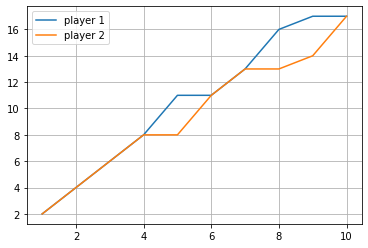

In [7]:
print('Let\'s see what happenes if a mainly nice guy plays against a tit fot tat\n')
outcome = play(mainly_nice, tit_for_tat, n, verbose=True)

As we can see in this specific total outcomes depend on the strategy adopted by the mainly nice guy, since it is not a deterministic strategy. But we can say that if the last move of the mainly nice guy is defect, the player will have a payoff grater than the opponet's one.

Let's run it a lot of time and let's see what happenes

In [8]:
repetition = 1000
mainly_nice_outcome = 0
tit_for_tat_outcome = 0
for i in range(repetition):
    outs = play(mainly_nice, tit_for_tat, n)
    mainly_nice_outcome += outs[0]
    tit_for_tat_outcome += outs[1]
mainly_nice_outcome = mainly_nice_outcome / repetition
tit_for_tat_outcome = tit_for_tat_outcome / repetition
print('Mainly Nice average outcome is:', mainly_nice_outcome)
print('Tit for tat average outcome is:', tit_for_tat_outcome)

Mainly Nice average outcome is: 18.073
Tit for tat average outcome is: 17.269


And let's compare this to the total outcome allowing mixed strategy

First player's strategy:		Second player's strategy:
[0.75 0.25] 					[1. 0.]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]
[0.75 0.25] 					[0.75 0.25]

The outcome of the first player is:
[2.25, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75] 

The outcome of the second player is:
[1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75] 

The total outcome for the first player is: 18.0
The total outcome for the second player is: 17.25


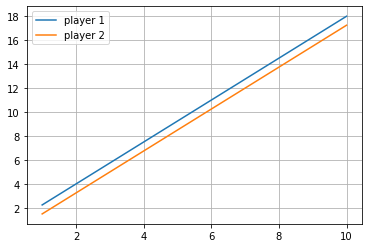

In [9]:
out = play(mainly_nice_mixed, tit_for_tat, n, verbose=True)

In order to demonstrate the correlation between mixed and pure strategies we decided to perform a Student's t-test starting by defining the **null hypothesis** $H_0$ (mixed strategies is correlated to the pure ones) and the level of significance $\alpha$ = 5%

mu = 22.5
sigma = 1.4524100486759755
sample mean = 22.46
T = 0.27540431874912563


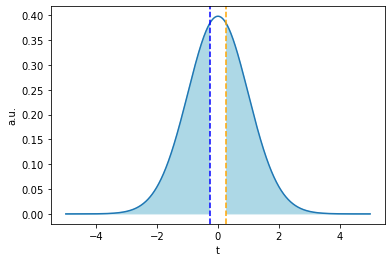

p-value = 0.783579622142212


In [10]:
mu = play(mainly_nice_mixed, nice_guy, n, verbose=False)[0]
print("mu =", mu)

samples_size = 100 # the size of the data sample
samples = []
for i in range(samples_size):
    p1_out = play(mainly_nice, nice_guy, n)[0]
    samples.append(p1_out)

samples = np.array(samples)
sigma = np.sqrt(np.var(samples, ddof=1))
print("sigma =", sigma)
sample_mean = np.mean(samples)
print("sample mean =", sample_mean)
T = abs((sample_mean - mu) / (sigma / np.sqrt(samples_size)))
print("T =", T)

x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x, samples_size - 1)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(-T, samples_size - 1) + (1. - stats.t.cdf(T, samples_size - 1))
print("p-value =", pvalue)

mu = 27.5
sigma = 1.3443108707332978
sample mean = 27.47
T = 0.223162667602596


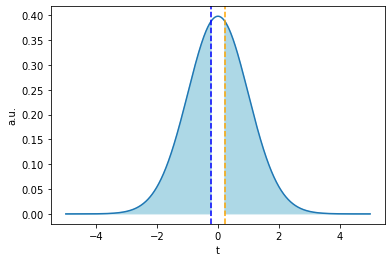

p-value = 0.8238687217995575


In [11]:
mu = play(mainly_bad_mixed, nice_guy, n, verbose=False)[0]
print("mu =", mu)

samples_size = 100 # the size of the data sample
samples = []
for i in range(samples_size):
    p1_out = play(mainly_bad, nice_guy, n)[0]
    samples.append(p1_out)

samples = np.array(samples)
sigma = np.sqrt(np.var(samples, ddof=1))
print("sigma =", sigma)
sample_mean = np.mean(samples)
print("sample mean =", sample_mean)
T = abs((sample_mean - mu) / (sigma / np.sqrt(samples_size)))
print("T =", T)

x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x, samples_size - 1)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(-T, samples_size - 1) + (1. - stats.t.cdf(T, samples_size - 1))
print("p-value =", pvalue)

Since the p-value is not $< \alpha/2$, we accept the null hypothesis.
From now on we consider only mixed strategy.

Let's keep on with some interesting comparisons:
* nice guy against bad guy
* bad guy against bad guy
* tit fot tat against bad guy
* nash equilibrium against nash equilibrium
* nash equilibrium against tit for tat
* nash equilibrium against grim trigger

First player's strategy:		Second player's strategy:
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]
[1 0] 					[0 1]

The outcome of the first player is:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

The outcome of the second player is:
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] 

The total outcome for the first player is: 0
The total outcome for the second player is: 30


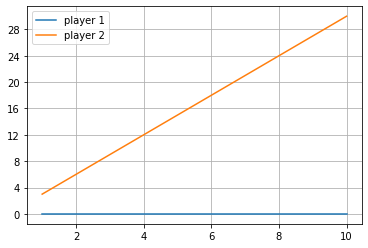

In [12]:
out = play(nice_guy, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]

The outcome of the first player is:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The outcome of the second player is:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The total outcome for the first player is: 10
The total outcome for the second player is: 10


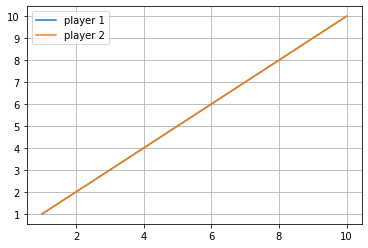

In [13]:
out = play(bad_guy, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]
[0 1] 					[0 1]

The outcome of the first player is:
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The outcome of the second player is:
[3, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

The total outcome for the first player is: 9
The total outcome for the second player is: 12


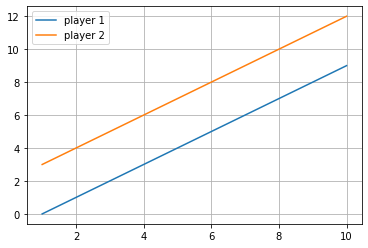

In [14]:
out = play(tit_for_tat, bad_guy, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[0 1]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1] 

The total outcome for the first player is: 19
The total outcome for the second player is: 19


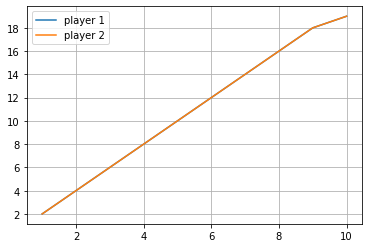

In [15]:
out = play(nash_equilibrium, nash_equilibrium, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[1 0]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 3] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 0] 

The total outcome for the first player is: 21
The total outcome for the second player is: 18


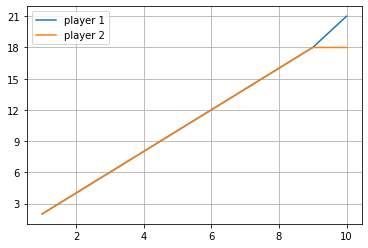

In [16]:
out = play(nash_equilibrium, tit_for_tat, n, verbose=True)

First player's strategy:		Second player's strategy:
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[1 0] 					[1 0]
[0 1] 					[1 0]

The outcome of the first player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 3] 

The outcome of the second player is:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 0] 

The total outcome for the first player is: 21
The total outcome for the second player is: 18


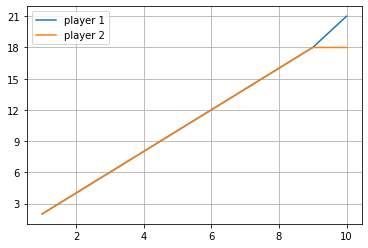

In [17]:
outcome = play( nash_equilibrium, grim_trigger, n, verbose=True)

## Conclusions

From this we can conclude that the way to achieve the best payoff is to play bad guy against nice guy, but in this configuration the nice guy achieve the lowest possible payoff, so nobody will play nice guy. 

An improvement could be playing bad guy against bad guy, but in this case both payoffs are not so high, playing tit for tat against bad guy does not improve the payoff of the first player, but allow the second player to respond with tit for tat.

Finally, as we know from the theory we can say that the Nash Equilibrium is the best strategy to play for both player, it consists on collaborate for each round but the last one, in this case after the last round there is no punishment aviable, so the best choice for all the player is acting in a selfish way and defect. 

# Second task

Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme

#### Preliminary definition

Let's define the round robin scheme

In [18]:
# If you want to see really in details what is happening set verbose = True
def round_robin(strategies, labels, number_of_stage, verbose=False):
    payoffs = np.empty((len(strategies),len(strategies)), dtype=object)
    winners = np.empty((len(strategies),len(strategies)), dtype=str)
    for i, (f_strat, f_label) in enumerate(zip(strategies, labels)):
        for j, (s_strat, s_label) in enumerate(zip(strategies, labels)):
            if verbose:
                print('First player is', f_label, 'second player is', s_label)
            outcome = play(f_strat, s_strat, number_of_stage, verbose=verbose)
            if outcome[0] == outcome[1]:
                winners[i, j] = '\u25EF' # It is a circle
                if verbose:
                    print('\nPlayers draw\n\n')
            elif outcome[0] > outcome[1]:
                winners[i, j] = '\u2B60' # It is a left arrow
                if verbose:
                    print('\nPlayer', f_label, 'wins\n\n')
            else:
                winners[i,j] = '\u2B61' # It is a up arrow
                if verbose:
                    print('\nPlayer', s_label, 'wins\n\n')
            payoffs[i, j] = outcome
    payoffs = pd.DataFrame(payoffs, columns = strategy_labels , index= strategy_labels)
    winners = pd.DataFrame(winners, columns = strategy_labels , index= strategy_labels)
    return payoffs, winners

## Output

Let's see what round_robin produces, if you want to see the whole process set verbose = True.

Whatch out, inside the touple the first payoff is the payoff of the player on the left.

In [19]:
strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

payoffs, winners = round_robin(strategies, strategy_labels, n, verbose=False)

display(payoffs)
display(winners)

,Nice Guy,Bad Guy,Mainly Nice Mixed,Mainly Bad Mixed,Tit for Tat,Nash equilibrium
Nice Guy,"(20, 20)","(0, 30)","(15.0, 22.5)","(5.0, 27.5)","(20, 20)","(18, 21)"
Bad Guy,"(30, 0)","(10, 10)","(25.0, 2.5)","(15.0, 7.5)","(12, 9)","(28, 1)"
Mainly Nice Mixed,"(22.5, 15.0)","(2.5, 25.0)","(17.5, 17.5)","(7.5, 22.5)","(18.0, 17.25)","(20.5, 16.0)"
Mainly Bad Mixed,"(27.5, 5.0)","(7.5, 15.0)","(22.5, 7.5)","(12.5, 12.5)","(14.0, 11.75)","(25.5, 6.0)"
Tit for Tat,"(20, 20)","(9, 12)","(17.25, 18.0)","(11.75, 14.0)","(20, 20)","(18, 21)"
Nash equilibrium,"(21, 18)","(1, 28)","(16.0, 20.5)","(6.0, 25.5)","(21, 18)","(19, 19)"


,Nice Guy,Bad Guy,Mainly Nice Mixed,Mainly Bad Mixed,Tit for Tat,Nash equilibrium
Nice Guy,◯,⭡,⭡,⭡,◯,⭡
Bad Guy,⭠,◯,⭠,⭠,⭠,⭠
Mainly Nice Mixed,⭠,⭡,◯,⭡,⭠,⭠
Mainly Bad Mixed,⭠,⭡,⭠,◯,⭠,⭠
Tit for Tat,◯,⭡,⭡,⭡,◯,⭡
Nash equilibrium,⭠,⭡,⭡,⭡,⭠,◯


# Third task

Iterate what done in the previous task (repeated MPIPD, rMPIPD) by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration.

## Implementation with random propagation

In [20]:
strat_dict = {
    'nice_guy' : nice_guy,
    'bad_guy' : bad_guy,
    'mainly_nice_mixed' : mainly_nice_mixed,
    'mainly_bad_mixed' : mainly_bad_mixed,
    'tit_for_tat' : tit_for_tat,
    'nash_equilibrium' : nash_equilibrium
}
strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

size = len(strategies)
best = 0.0
propagated = 0
cont = 0

for i in range(0, size+1):
    payoffs, winners = round_robin(strategies, strategy_labels, n, verbose=False)
    #We calculate the total payoff of each strategie, to decide which one will propagate
    sum_up = np.empty(len(strategies), dtype=float)
    payoffs["Sum"] = payoffs.sum(axis=1)
    for j in range(0, len(payoffs["Sum"])):
        try:
            l = list(payoffs.at[strategy_labels[j] ,"Sum"])
            payoffs.at[strategy_labels[j], "Sum"] = sum(l[0])
        except:
            if sum(list(payoffs.at[strategy_labels[j] ,"Sum"])) < 300:
                payoffs.at[strategy_labels[j], "Sum"] = sum(list(payoffs.at[strategy_labels[j] ,"Sum"]))
                print(payoffs)
    #We compare the results of each strategy and select the strategy with the most impact on the population
    for t in enumerate(list(payoffs["Sum"])):
        if t[1] > best:
            best = t[1]
            row = payoffs.iloc[t[0]]
    #This propagates in a random manner
    while (propagated == 0):
        prop = random.randint(0, len(strategies)-1)
        prop_strat = row.name.replace(" ", "_").lower()
        func = strat_dict[prop_strat]
        if (func != strategies[prop]):
            strategies[prop] = func
            strategy_labels[prop] = row.name
            propagated = 1
        if cont > len(strategies):
            propagated = 1
        cont += 1
    propagated = 0
    cont = 0
display(payoffs)
display(winners)

                       Nice Guy      Bad Guy Mainly Nice Mixed  \
Nice Guy               (20, 20)      (0, 30)      (15.0, 22.5)   
Bad Guy                 (30, 0)     (10, 10)       (25.0, 2.5)   
Mainly Nice Mixed  (22.5, 15.0)  (2.5, 25.0)      (17.5, 17.5)   
Mainly Bad Mixed    (27.5, 5.0)  (7.5, 15.0)       (22.5, 7.5)   
Tit for Tat            (20, 20)      (9, 12)     (17.25, 18.0)   
Nash equilibrium       (21, 18)      (1, 28)      (16.0, 20.5)   

                  Mainly Bad Mixed    Tit for Tat Nash equilibrium  \
Nice Guy               (5.0, 27.5)       (20, 20)         (18, 21)   
Bad Guy                (15.0, 7.5)        (12, 9)          (28, 1)   
Mainly Nice Mixed      (7.5, 22.5)  (18.0, 17.25)     (20.5, 16.0)   
Mainly Bad Mixed      (12.5, 12.5)  (14.0, 11.75)      (25.5, 6.0)   
Tit for Tat          (11.75, 14.0)       (20, 20)         (18, 21)   
Nash equilibrium       (6.0, 25.5)       (21, 18)         (19, 19)   

                                              

,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Sum
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240


,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯


## Implementation without random propagation

In [21]:
strat_dict = {
    'nice_guy' : nice_guy,
    'bad_guy' : bad_guy,
    'mainly_nice_mixed' : mainly_nice_mixed,
    'mainly_bad_mixed' : mainly_bad_mixed,
    'tit_for_tat' : tit_for_tat,
    'nash_equilibrium' : nash_equilibrium
}
strategies = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']

size = len(strategies)
best = 0.0
propagated = 0
cont = 0

for i in range(0, size+1):
    payoffs, winners = round_robin(strategies, strategy_labels, n, verbose=False)
    #We calculate the total payoff of each strategie, to decide which one will propagate
    sum_up = np.empty(len(strategies), dtype=float)
    payoffs["Sum"] = payoffs.sum(axis=1)
    for j in range(0, len(payoffs["Sum"])):
        try:
            l = list(payoffs.at[strategy_labels[j] ,"Sum"])
            payoffs.at[strategy_labels[j], "Sum"] = sum(l[0])
        except:
            if sum(list(payoffs.at[strategy_labels[j] ,"Sum"])) < 300:
                payoffs.at[strategy_labels[j], "Sum"] = sum(list(payoffs.at[strategy_labels[j] ,"Sum"]))
                print(payoffs)
    #We compare the results of each strategy and select the strategy with the most impact on the population
    for t in enumerate(list(payoffs["Sum"])):
        if t[1] > best:
            best = t[1]
            row = payoffs.iloc[t[0]]
    #This will find the next player with different strategy and propagate
    while (propagated == 0):
        prop_strat = row.name.replace(" ", "_").lower()
        func = strat_dict[prop_strat]
        if (func != strategies[cont]):
            strategies[cont] = func
            strategy_labels[cont] = row.name
            propagated = 1
        if cont >= len(strategies)-1:
            propagated = 1
        cont += 1
    propagated = 0
    cont = 0
display(payoffs)
display(winners)

                       Nice Guy      Bad Guy Mainly Nice Mixed  \
Nice Guy               (20, 20)      (0, 30)      (15.0, 22.5)   
Bad Guy                 (30, 0)     (10, 10)       (25.0, 2.5)   
Mainly Nice Mixed  (22.5, 15.0)  (2.5, 25.0)      (17.5, 17.5)   
Mainly Bad Mixed    (27.5, 5.0)  (7.5, 15.0)       (22.5, 7.5)   
Tit for Tat            (20, 20)      (9, 12)     (17.25, 18.0)   
Nash equilibrium       (21, 18)      (1, 28)      (16.0, 20.5)   

                  Mainly Bad Mixed    Tit for Tat Nash equilibrium  \
Nice Guy               (5.0, 27.5)       (20, 20)         (18, 21)   
Bad Guy                (15.0, 7.5)        (12, 9)          (28, 1)   
Mainly Nice Mixed      (7.5, 22.5)  (18.0, 17.25)     (20.5, 16.0)   
Mainly Bad Mixed      (12.5, 12.5)  (14.0, 11.75)      (25.5, 6.0)   
Tit for Tat          (11.75, 14.0)       (20, 20)         (18, 21)   
Nash equilibrium       (6.0, 25.5)       (21, 18)         (19, 19)   

                                              

,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Sum
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240
Nice Guy,"(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)","(20, 20)",240


,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy,Nice Guy
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯
Nice Guy,◯,◯,◯,◯,◯,◯


## Fourth task

Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.

Comment: (It will not be included in the final release)
I have created a population (get_population) of a specific number of players, each player has a "gene" that specify the strategy(its nature), the "mutate" function takes randomly two players and make them play, one generation is complete when all players have fighted one time each(so not all vs all), the player that lose will be mutated into the strongest one(natural selection). 

I am not sure if this is the correct way to implement and it if this is what the professor ask to us. What do you think? 


The initial population is distributed as follows: 


,Genotype,Genes per type
0,Bad Guy,1632
1,Mainly Bad Mixed,1704
2,Mainly Nice Mixed,1705
3,Nash equilibrium,1677
4,Nice Guy,1641
5,Tit for Tat,1641


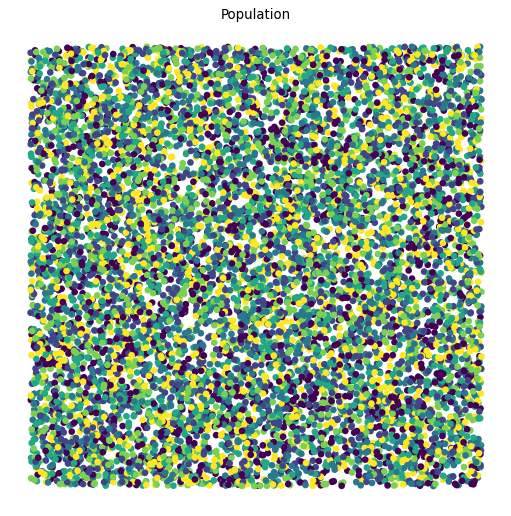

Generation:  1


,Genotype,Genes per type
0,Bad Guy,3012
1,Mainly Bad Mixed,2532
2,Mainly Nice Mixed,2024
3,Nash equilibrium,1322
4,Nice Guy,581
5,Tit for Tat,529


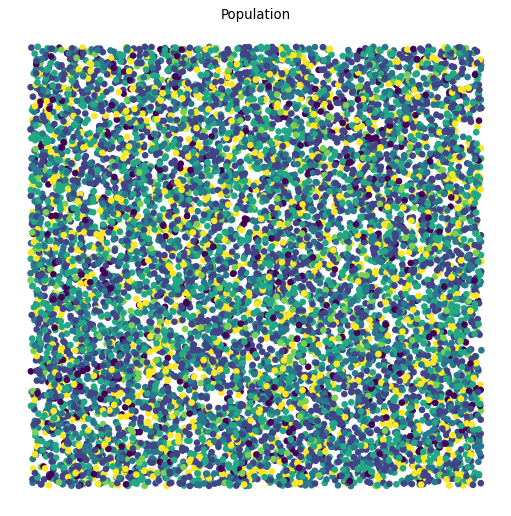

Generation:  2


,Genotype,Genes per type
0,Bad Guy,5134
1,Mainly Bad Mixed,2902
2,Mainly Nice Mixed,1350
3,Nash equilibrium,490
4,Nice Guy,71
5,Tit for Tat,53


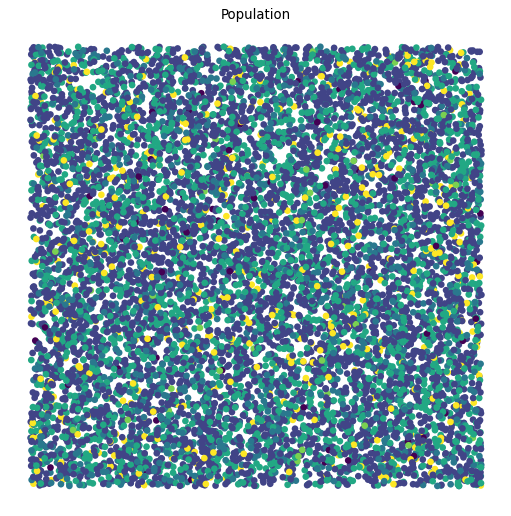

Generation:  3


,Genotype,Genes per type
0,Bad Guy,7690
1,Mainly Bad Mixed,1906
2,Mainly Nice Mixed,376
3,Nash equilibrium,28


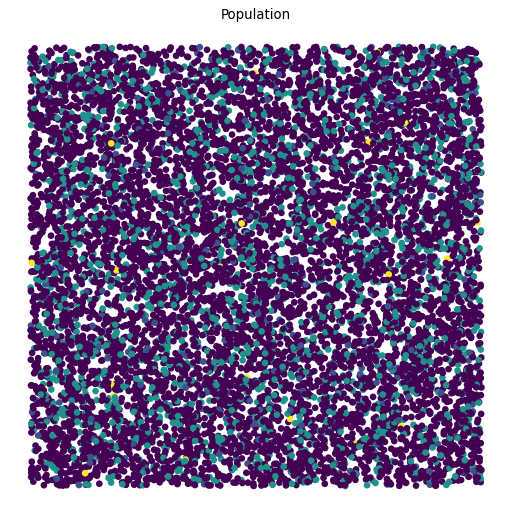

Generation:  4


,Genotype,Genes per type
0,Bad Guy,9521
1,Mainly Bad Mixed,467
2,Mainly Nice Mixed,12


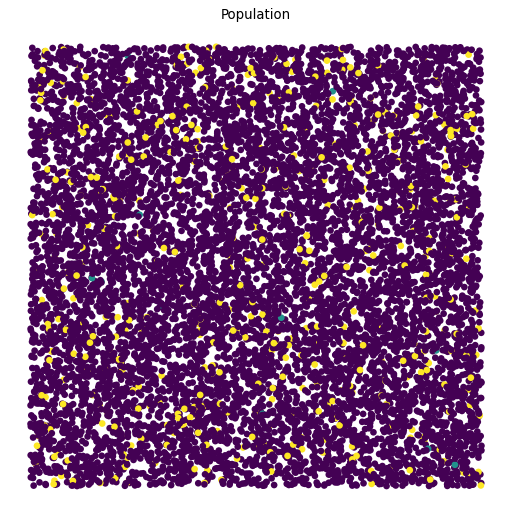

Generation:  5


,Genotype,Genes per type
0,Bad Guy,9974
1,Mainly Bad Mixed,26


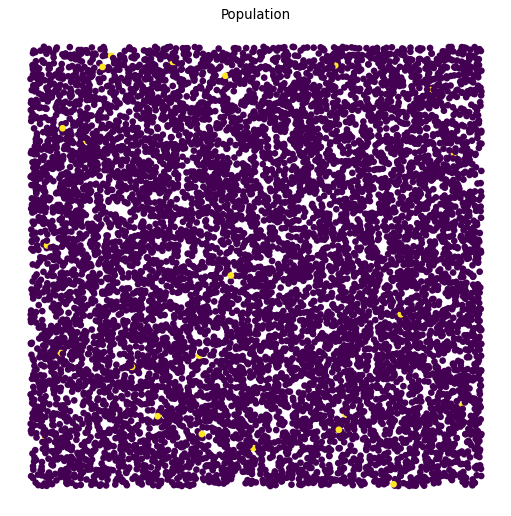

Generation:  6


,Genotype,Genes per type
0,Bad Guy,10000


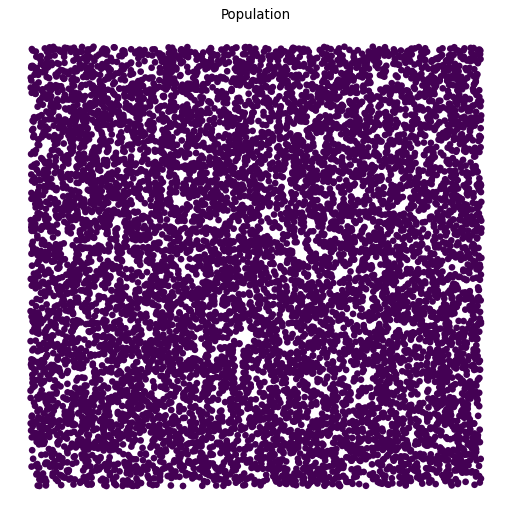

In [69]:
np.random.seed(1996)

def get_strategy():
    
    strategy = [nice_guy, bad_guy, mainly_nice_mixed, mainly_bad_mixed, tit_for_tat, nash_equilibrium]
    strategy_labels =['Nice Guy','Bad Guy','Mainly Nice Mixed', 'Mainly Bad Mixed', 'Tit for Tat', 'Nash equilibrium']
    return strategy, strategy_labels

def plot_population(population):
    
    N = len(population)
    X, Y = np.random.rand(2, N)
    genotype,genotype_labels = get_strategy()
    i = 0
    
    df = pd.DataFrame(population, columns=['Genotype'])
    for g in genotype:
        df[df['Genotype'] == g] = i
        i += 1
        
    cmap = df.iloc[:].values
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    ax.set_title("Population")
    ax.scatter(X,Y,c=cmap, edgecolors='none')
    ax.axis('off')
    #ax.legend()
    plt.show()

def results_mutation(population):
    df = pd.DataFrame(population, columns=['Genotype'])
    
    genotype,genotype_labels = get_strategy()
    
    for g, g_lables in zip(genotype, genotype_labels):
        df[df['Genotype'] == g] = g_lables
    
    results =df.groupby('Genotype').size().reset_index(name='Genes per type')
    display(results)
    print("\n")
    
def get_population(size):
    genotype,_ = get_strategy()
    population_init = np.random.randint(0, len(genotype), size)
    population = []
    for i in range(size):
        population.append(genotype[population_init[i]])
            
    print("The initial population is distributed as follows: ")
    
    results_mutation(population)
    plot_population(population)
    return population

def mutate(population):
    random.shuffle(population)
    firts_half = np.arange(0,int(len(population)/2 - 1))
    second_half = np.arange(int(len(population)/2) , len(population))
    for i in range(len(firts_half)):
        score_1st, score_2nd = play(population[firts_half[i]], population[second_half[i]], n)
        if (score_1st > score_2nd):
                population[second_half[i]] = population[firts_half[i]] #mutation
        elif (score_1st < score_2nd):
                population[firts_half[i]] = population[second_half[i]] #mutation
    
    results_mutation(population)
    plot_population(population)
    return population

def evolve(population, number_of_generation):
    for i in range(number_of_generation):
        print("Generation: ",i+1)
        population_mutated = mutate(population)
    return population_mutated
    


Number_of_individuals = 10000
Number_of_generation = 6

    
population = get_population(Number_of_individuals)

population_mutated = evolve(population, Number_of_generation)

